In [3]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install langdetect

     |████████████████████████████████| 981 kB 865 kB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=c09be08a64fd82578316135215970a5dc1ae161eb58bba2e04ba1e8b33b87f92
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
tweet_list = pd.read_csv('../input/myanmar-coup-2021/WhatsHappeningInMyanmar_05272021.csv')
tweet_list

,0,text
0,RT @SaveMM99: We kindly urge POSCO to stop fun...,RT @SaveMM99: We kindly urge POSCO to stop fun...
1,"RT @MayWongCNA: Another minor, a 14-year-old b...","RT @MayWongCNA: Another minor, a 14-year-old b..."
2,Maha Aung Myay people strike against the milit...,Maha Aung Myay people strike against the milit...
3,RT @Eunna_Berry: Peaceful night protesting in ...,RT @Eunna_Berry: Peaceful night protesting in ...
4,"Youths from #Mingalardon, Yangon launched a do...","Youths from #Mingalardon, Yangon launched a do..."
...,...,...
1132,RT @PartnersRelief: Thangboi* is one of the yo...,RT @PartnersRelief: Thangboi* is one of the yo...
1133,May the people of Kayah State be safe\n#WhatsH...,May the people of Kayah State be safe\n#WhatsH...
1134,"RT @Daniel78037553: #POSCO, as long as you are...","RT @Daniel78037553: #POSCO, as long as you are..."
1135,RT @Eunna_Berry: Evening Strike by Mandalay St...,RT @Eunna_Berry: Evening Strike by Mandalay St...


In [6]:
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0,text
0,RT @SaveMM99: We kindly urge POSCO to stop fun...,RT @SaveMM99: We kindly urge POSCO to stop fun...
1,"RT @MayWongCNA: Another minor, a 14-year-old b...","RT @MayWongCNA: Another minor, a 14-year-old b..."
2,Maha Aung Myay people strike against the milit...,Maha Aung Myay people strike against the milit...
3,RT @Eunna_Berry: Peaceful night protesting in ...,RT @Eunna_Berry: Peaceful night protesting in ...
4,"Youths from #Mingalardon, Yangon launched a do...","Youths from #Mingalardon, Yangon launched a do..."
...,...,...
1132,RT @PartnersRelief: Thangboi* is one of the yo...,RT @PartnersRelief: Thangboi* is one of the yo...
1133,May the people of Kayah State be safe\n#WhatsH...,May the people of Kayah State be safe\n#WhatsH...
1134,"RT @Daniel78037553: #POSCO, as long as you are...","RT @Daniel78037553: #POSCO, as long as you are..."
1135,RT @Eunna_Berry: Evening Strike by Mandalay St...,RT @Eunna_Berry: Evening Strike by Mandalay St...


In [7]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = tweet_list.copy()

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @SaveMM99: We kindly urge POSCO to stop fun...,we kindly urge posco to stop funding myanmar ...
1,"RT @MayWongCNA: Another minor, a 14-year-old b...",another minor a 14 year old boy shot amp k...
2,Maha Aung Myay people strike against the milit...,maha aung myay people strike against the milit...
3,RT @Eunna_Berry: Peaceful night protesting in ...,peaceful night protesting in lonekhin village...
4,"Youths from #Mingalardon, Yangon launched a do...",youths from mingalardon yangon launched a do...
5,RT @nslwin: SAC Terrorist Group abducted DAW N...,sac terrorist group abducted daw ni ni nyunt ...
6,"RT @nslwin: LOIKAW, Karenni (Kayah) State:\n\n...",loikaw karenni kayah state a 14 years ol...
7,"People from #TampaWady ward, #Mandalay held ni...",people from tampawady ward mandalay held ni...
8,Students from Mandalay University and resident...,students from mandalay university and resident...
9,"RT @nslwin: MATUPI, Chin State:\n\nLocal peopl...",matupi chin state local people said sac te...


In [8]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @SaveMM99: We kindly urge POSCO to stop fun...,we kindly urge posco to stop funding myanmar ...,-0.25,0.675,negative,0.322,0.570,0.107,-0.7506
1,"RT @MayWongCNA: Another minor, a 14-year-old b...",another minor a 14 year old boy shot amp k...,-0.07,0.120,negative,0.181,0.723,0.096,-0.4767
2,Maha Aung Myay people strike against the milit...,maha aung myay people strike against the milit...,-0.10,0.100,negative,0.081,0.919,0.000,-0.1280
3,RT @Eunna_Berry: Peaceful night protesting in ...,peaceful night protesting in lonekhin village...,0.25,0.500,positive,0.187,0.600,0.213,0.1027
4,"Youths from #Mingalardon, Yangon launched a do...",youths from mingalardon yangon launched a do...,0.00,0.100,positive,0.075,0.550,0.375,0.7184
5,RT @nslwin: SAC Terrorist Group abducted DAW N...,sac terrorist group abducted daw ni ni nyunt ...,0.00,0.000,negative,0.308,0.692,0.000,-0.8402
6,"RT @nslwin: LOIKAW, Karenni (Kayah) State:\n\n...",loikaw karenni kayah state a 14 years ol...,-0.05,0.100,negative,0.383,0.617,0.000,-0.9246
7,"People from #TampaWady ward, #Mandalay held ni...",people from tampawady ward mandalay held ni...,0.00,0.000,negative,0.100,0.900,0.000,-0.2500
8,Students from Mandalay University and resident...,students from mandalay university and resident...,-0.10,0.100,negative,0.097,0.903,0.000,-0.1280
9,"RT @nslwin: MATUPI, Chin State:\n\nLocal peopl...",matupi chin state local people said sac te...,-0.15,0.200,negative,0.207,0.793,0.000,-0.6908


In [9]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [10]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [11]:
#Count_values for sentiment
pc  = count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
negative,795,69.92
positive,185,16.27
neutral,157,13.81


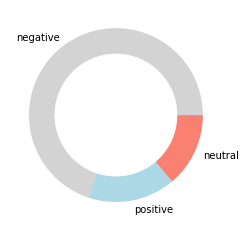

In [12]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightgray','lightblue','salmon'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    mask = np.array(Image.open("../input/myanmar-coup-2021/istockphoto-508950022-612x612.jpg"))
    wc = WordCloud(background_color="white", mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


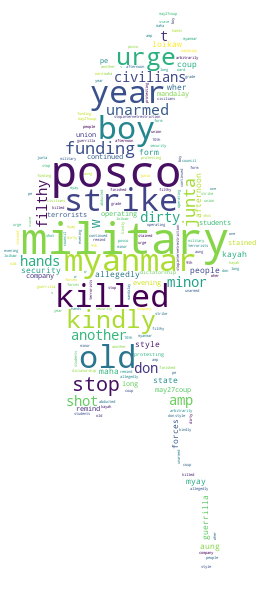

In [14]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


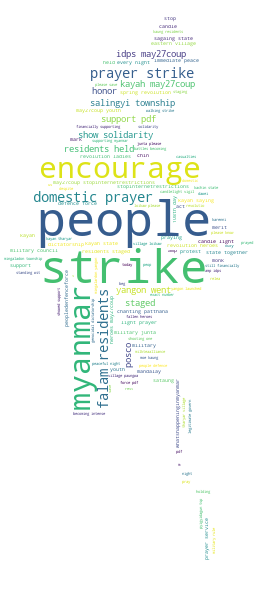

In [15]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


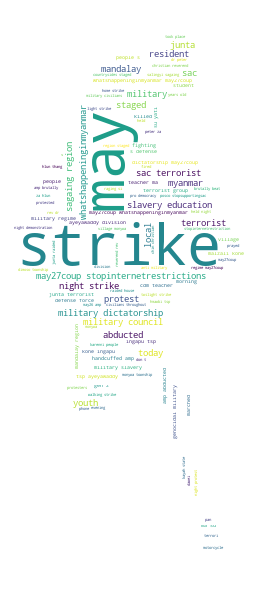

In [16]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


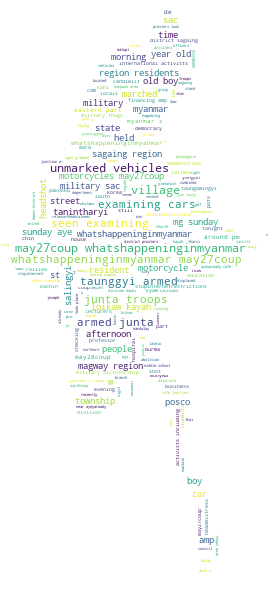

In [17]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [18]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [19]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,115.63
neutral,93.99
positive,113.76


In [20]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.93
neutral,12.39
positive,16.99


In [21]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [22]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [23]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [24]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [25]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [26]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @SaveMM99: We kindly urge POSCO to stop fun...,we kindly urge posco to stop funding myanmar ...,-0.25,0.675,negative,0.322,0.570,0.107,-0.7506,127,23,we kindly urge posco to stop funding myanmar ...,"[, we, kindly, urge, posco, to, stop, funding,...","[, kindly, urge, posco, stop, funding, myanmar...","[, kindli, urg, posco, stop, fund, myanmar, ju..."
1,"RT @MayWongCNA: Another minor, a 14-year-old b...",another minor a 14 year old boy shot amp k...,-0.07,0.120,negative,0.181,0.723,0.096,-0.4767,129,21,another minor a year old boy shot amp kil...,"[, another, minor, a, year, old, boy, shot, am...","[, another, minor, year, old, boy, shot, amp, ...","[, anoth, minor, year, old, boy, shot, amp, ki..."
2,Maha Aung Myay people strike against the milit...,maha aung myay people strike against the milit...,-0.10,0.100,negative,0.081,0.919,0.000,-0.1280,115,18,maha aung myay people strike against the milit...,"[maha, aung, myay, people, strike, against, th...","[maha, aung, myay, people, strike, military, c...","[maha, aung, myay, peopl, strike, militari, co..."
3,RT @Eunna_Berry: Peaceful night protesting in ...,peaceful night protesting in lonekhin village...,0.25,0.500,positive,0.187,0.600,0.213,0.1027,110,11,peaceful night protesting in lonekhin village...,"[, peaceful, night, protesting, in, lonekhin, ...","[, peaceful, night, protesting, lonekhin, vill...","[, peac, night, protest, lonekhin, villag, pha..."
4,"Youths from #Mingalardon, Yangon launched a do...",youths from mingalardon yangon launched a do...,0.00,0.100,positive,0.075,0.550,0.375,0.7184,117,16,youths from mingalardon yangon launched a do...,"[youths, from, mingalardon, yangon, launched, ...","[youths, mingalardon, yangon, launched, domest...","[youth, mingalardon, yangon, launch, domest, s..."


In [27]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1137 Number of reviews has 1541 words


In [28]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aapp,abandon,abduct,abducte,abo,abolish,abolit,absolut,accomplic,...,zarni,zaw,zayat,zaycho,zealand,zee,zi,zin,zone,zun
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
maycoup,392
strike,348
militari,335
peopl,193
whatshappeninginmyanmar,189
terrorist,171
villag,156
junta,151
township,151
protest,148


In [30]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('may27coup stopinternetrestrictions', 88),
 ('military dictatorship', 67),
 ('night strike', 66),
 ('whatshappeninginmyanmar may27coup', 59),
 ('may27coup whatshappeninginmyanmar', 56),
 ('strike military', 55),
 ('sagaing region', 52),
 ('military council', 49),
 ('slavery education', 40),
 ('su yati', 33),
 ('protest military', 32),
 ('cdm teacher', 32),
 ('sac terrorist', 31),
 ('military regime', 31),
 ('terrorist group', 30),
 ('ma su', 30),
 ('military slavery', 29),
 ('mandalay region', 28),
 ('pro democracy', 27),
 ('kayah state', 26)]

In [32]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('sac terrorist group', 30),
 ('military slavery education', 29),
 ('strike military dictatorship', 25),
 ('ma su yati', 25),
 ('malzali kone ingapu', 25),
 ('kone ingapu tsp', 25),
 ('ingapu tsp ayeyawaddy', 25),
 ('tsp ayeyawaddy division', 25),
 ('cdm teacher ma', 24),
 ('teacher ma su', 24),
 ('su yati malzali', 24),
 ('yati malzali kone', 24),
 ('ayeyawaddy division handcuffed', 24),
 ('division handcuffed amp', 24),
 ('handcuffed amp abducted', 23),
 ('salingyi sagaing region', 23),
 ('held night strike', 22),
 ('domestic prayer strike', 22),
 ('fighting karenni people', 22),
 ('karenni people defense', 22)]